## IMDB Movie Review Sentiment Analysis
We will look at 50000 different movie reviews and predict whether the review is positive or negative.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Importing Dataset
df = pd.read_csv('../Dataset/IMDB dataset.csv')
print("Shape of dataset:",df.shape)
df.head()

Shape of dataset: (10000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [114]:
## Missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [115]:
## All duplicate reviews
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
6672,Sigh. I'm baffled when I see a short like this...,negative
7221,"I have always been a huge fan of ""Homicide: Li...",positive
7222,There are plenty of comments already posted sa...,negative
7425,"The movie was excellent, save for some of the ...",positive
7555,This movie has made me upset! When I think of ...,negative


In [116]:
## Droping all duplicates
df.drop_duplicates(inplace=True)
df.shape

(9983, 2)

In [117]:
## Printing first 3 reviews
for i in range(3):
   print(df['review'][i])
   print('----'*10)
   print()

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

#### Creating additional features
we will also create listed features which can help us get better result
1. Length of review
2. Number of words
3. Number of stop words

<Axes: xlabel='sentiment'>

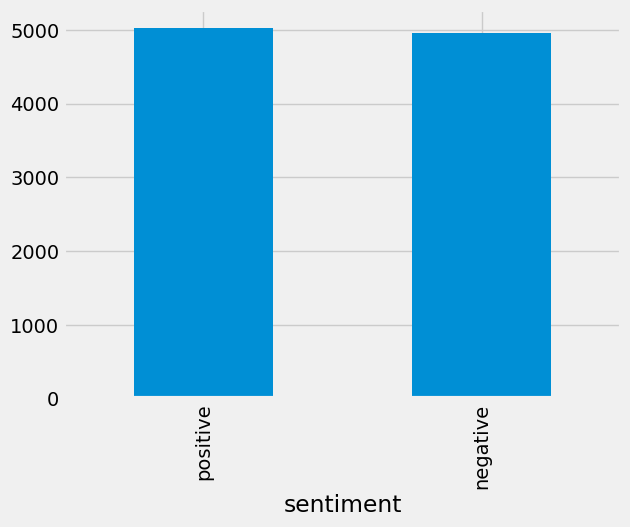

In [118]:
df['sentiment'].value_counts().plot(kind='bar')

Dataset is perfectly balanced and have no missing values.
-> There is no need for imputation, SMOTE or any other technique.

In [119]:
# import WordCloud as WC

# # word cloud for positive review words
# plt.figure(figsize=(10,10))
# positive_text = 
# WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
# positive_words = WC.generate(positive_text)
# plt.imshow(positive_words,interpolation='bilinear')
# plt.show

### Text preprocessing:

In [120]:
## 1) Removing all HTML tags
df['review'] = df['review'].str.replace('<.*?>', '', regex=True)

## 2) Losercasing
df['review'] = df['review'].str.lower()

In [121]:
## 3) Expanding short forms
import re

contractions = {
    "don't": "do not", "can't": "cannot", "i'm": "i am", "isn't": "is not",
    "it's": "it is", "didn't": "did not", "won't": "will not", "you're": "you are",
    "they're": "they are", "we're": "we are", "aren't": "are not", "wasn't": "was not",
    "hasn't": "has not", "haven't": "have not", "wouldn't": "would not"
}
def expand_contractions(text):
    for word, replacement in contractions.items():
        text = re.sub(r"\b{}\b".format(word), replacement, text)
    return text

df['review'] = df['review'].apply(expand_contractions)

> We measure length of reviews after removing all HTML tags

In [122]:
## 4) Removing punctuations
import string
punc = string.punctuation
df['review'] = df['review'].str.translate(str.maketrans('', '', punc))

In [123]:
## feature-1: Original review length
df['orig_len'] = df['review'].apply(len)

## feature-2: Original word count
df['word_count'] = df['review'].str.split().apply(len)

In [124]:
## 5) Removing stop words
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.sample(4)

,review,sentiment,orig_len,word_count
8154,cornel wilde three dumbbells search sunken tre...,negative,805,145
8714,castle blood aka castle terror wellcrafted sur...,positive,1638,269
2623,hi everyone oh boy one lulu really bad backgro...,negative,1409,274
5422,ive finished listening directors commentary fi...,positive,630,116


In [125]:
## feature-3: Stop word count
df['stop_word_count'] = df['word_count'] - df['review'].str.split().apply(len)

## feature-4: Final length

In [126]:
## 6) Converting number to words
from num2words import num2words
## 7) Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

## Function to covnert number into words and stemming together
def NumericalStemmer(sentence):
   words = sentence.split()
   sent = []
   for word in words:
      if word.isdigit():
         sent.append(num2words(int(word)))
      else:
         sent.append(ps.stem(word))
   return " ".join(sent)

df['review'] = df['review'].apply(NumericalStemmer)

In [127]:
## Again Print first 3 reviews after preprocessing:
## Printing first 3 reviews
for i in range(3):
   print(df['review'][i])
   print('----'*10)
   print()

one review mention watch one oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show would dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom co

In [128]:
print("Longest length of Review: ", max(df['orig_len']))
print("Longest length of Review: ", min(df['orig_len']))

print("Maximum number of word in any review: ",max(df['word_count']))
print("Minimum number of word in any review: ",min(df['word_count']))

Longest length of Review:  9764
Longest length of Review:  76
Maximum number of word in any review:  1787
Minimum number of word in any review:  14


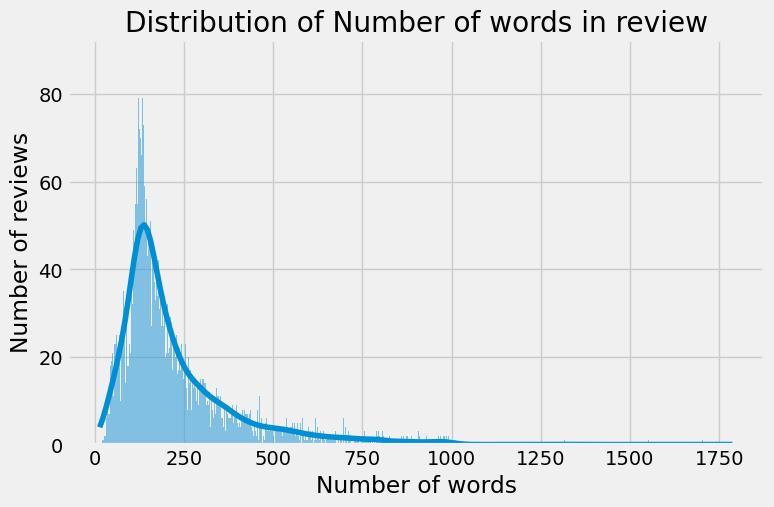

In [129]:
## Plotting Dsitribution of word count
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,5))
sns.histplot(df, x='word_count', binwidth=1, kde=True)

plt.title("Distribution of Number of words in review")
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.show()

> ##### Reviews with more then 1000 words are too long and should be removed.

In [130]:
df.drop(index = df[df['word_count']>1000].index)

,review,sentiment,orig_len,word_count,stop_word_count
0,one review mention watch one oz episod youll h...,positive,1667,302,134
1,wonder littl product film techniqu unassum old...,positive,936,156,72
2,thought wonder way spend time hot summer weeke...,positive,874,162,76
3,basic there famili littl boy jake think there ...,negative,690,130,64
4,petter mattei love time money visual stun film...,positive,1237,222,97
...,...,...,...,...,...
9995,fun entertain movi wwii german spi juli andrew...,positive,843,149,60
9996,give break anyon say good hockey movi know mov...,negative,1128,217,111
9997,movi bad movi watch endless seri bad horror mo...,negative,1144,228,121
9998,movi probabl made entertain middl school earli...,negative,718,140,76


In [131]:
## Also need to convert sentiment into numerical values
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

### Text vectorization

In [132]:
## Splitting data into train and test
X = df.drop('sentiment', axis=1)
Y = df['sentiment'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7986, 4), (1997, 4), (7986,), (1997,))

In [133]:
## 1) BOW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000, min_df=3, ngram_range=(1,3))
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()
X_train_bow.shape

(7986, 3000)

In [134]:
## 2) TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, min_df=3, ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review']).toarray()
X_test_tfidf.shape

(1997, 3000)

##### Applying ML algorithms to find which vectorization method is best

In [135]:
## 1) Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_bow = MultinomialNB()
mnb_tfidf = MultinomialNB()
BOW_naive = mnb_bow.fit(X_train_bow, y_train)
TFIDF_naive = mnb_tfidf.fit(X_train_tfidf, y_train)
BOW_naive_score = mnb_bow.score(X_test_bow, y_test)
TFIDF_naive_score = mnb_tfidf.score(X_test_tfidf, y_test)

print("BOW Naive Bayes score:", BOW_naive_score)
print("TFIDF Naive Bayes score:", TFIDF_naive_score)

BOW Naive Bayes score: 0.8307461191787682
TFIDF Naive Bayes score: 0.8442663995993991


In [136]:
# ## 2) XGBoost
# from xgboost import XGBClassifier

# xgb_bow = XGBClassifier()
# xgb_tfidf = XGBClassifier()
# BOW_xgb = xgb_bow.fit(X_train_bow, y_train)
# TFIDF_xgb = xgb_tfidf.fit(X_train_tfidf, y_train)
# BOW_xgb_score = xgb_bow.score(X_test_bow, y_test)
# TFIDF_xgb_score = xgb_tfidf.score(X_test_tfidf, y_test)

# print("BOW XGBoost score:", BOW_xgb_score)
# print("TFIDF XGBoost score:", TFIDF_xgb_score)

In [137]:
# ## 3) RandomBoost
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# rf_bow = RandomForestClassifier()
# rf_tfidf = RandomForestClassifier()
# BOW_xgb = rf_bow.fit(X_train_bow, y_train)
# TFIDF_xgb = rf_tfidf.fit(X_train_tfidf, y_train)
# BOW_xgb_score = accuracy_score(y_test, rf_bow.predict(X_test_bow))
# TFIDF_xgb_score = accuracy_score(y_test, rf_tfidf.predict(X_test_tfidf))

# print("BOW Random Forest score:", BOW_xgb_score)
# print("TFIDF Random Forest score:", TFIDF_xgb_score)

#### Hyperparameter tuning for Naive bayes:

In [138]:
# from sklearn.model_selection import GridSearchCV

# NB = MultinomialNB()
# params = {'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 1.0], 'fit_prior': [True]}
# clf = GridSearchCV(NB, params, cv=3, n_jobs=-1, verbose=3)
# clf.fit(X_train_bow, y_train)

# print("Best parameters found: ", clf.best_params_)
# print("Best score: ", clf.best_score_)

### Textual preprocessing for Deep Learning:

In [139]:
import tensorflow as tf
import tensorflow.keras as kr

## Parameter for vocabulary
vocab_size = 5000 # Total number of word tracked
maxlen = 500 # Max review length
oov_token = "<Unknown>" # Default token for any out of vocabulary word

## Creating a vocabulary of words
tokenizer = kr.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train['review'])

In [140]:
# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train['review'])
X_test_seq = tokenizer.texts_to_sequences(X_test['review'])

# Pad the sequences to have equal length
X_train_seq = kr.preprocessing.sequence.pad_sequences(X_train_seq, 
   maxlen=maxlen, padding='post', truncating='post')
X_test_seq = kr.preprocessing.sequence.pad_sequences(X_test_seq, 
   maxlen=maxlen, padding='post', truncating='post')

In [158]:
## Create an RNN with Embedding + LSTM + Dense layers
model = kr.models.Sequential()

## Word 2 vec text embedding layer
model.add(kr.layers.Embedding(input_dim=vocab_size, output_dim=64, input_shape=(maxlen,)))
## Main model LSTM layer
model.add(kr.layers.LSTM(units=64, return_sequences=False))

# model.add(kr.layers.Dropout(0.5))
model.add(kr.layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 500, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353,089 (1.35 MB)

 Trainable params: 353,089 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_data=(X_test_seq, y_test))
history

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 204ms/step - accuracy: 0.5002 - loss: 0.6938 - val_accuracy: 0.4942 - val_loss: 0.6931
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - accuracy: 0.5031 - loss: 0.6932 - val_accuracy: 0.4942 - val_loss: 0.6938
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 285ms/step - accuracy: 0.5048 - loss: 0.6930 - val_accuracy: 0.4942 - val_loss: 0.6934
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 289ms/step - accuracy: 0.4995 - loss: 0.6924 - val_accuracy: 0.4942 - val_loss: 0.6933
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 284ms/step - accuracy: 0.4897 - loss: 0.6922 - val_accuracy: 0.5073 - val_loss: 0.6925


In [ ]:
# Model Training Visualization:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

> ##### We can see that our model is overfitting the training data.
Overall, model performance is better using naive bayes ML model.